In [30]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [31]:
genre = 'bolero'
tango = pd.read_csv(f'/mnt/s/stiven/proyects/final_cuanti/final_data/{genre}_with_e.csv', sep='|', header=0,
                 names = ['song_name', 'artist', 'lyric', 'lyric_by_e', 'lang', 'lyric_length', 'eval', 'misogy_estr'])
tango = tango.dropna(axis = 0, how ='any') 
print(len(tango))

799


In [32]:
import ast
genre = genre.capitalize()
df = pd.DataFrame(columns=['Categoría', f'Resultados por Categoría {genre}'])
for elm in tango['eval']:
    li = ast.literal_eval(elm)

    a = li[0][0]
    b = li[0][1]

    if a == 'active' or a == 'passive':
        a = li[1][0]
        b = li[0][1]

    if a == 'sexual_harassment':
        a ='acoso sexual'
    elif a == 'discredit':
        a = 'desprestigio' 
    elif a == 'stereotype':
        a = 'estereotipo'
    elif a == 'dominance':
        a = 'dominancia'

    df.loc[len(df)] = [a, b]
indexLang = df[round(df[f'Resultados por Categoría {genre}']) < 25].index
df.drop(indexLang, inplace=True)
df

,Categoría,Resultados por Categoría Bolero
3,acoso sexual,37.707621
4,acoso sexual,69.541377
6,acoso sexual,44.080642
7,acoso sexual,38.658020
9,estereotipo,77.341944
...,...,...
788,estereotipo,70.072818
791,estereotipo,60.500437
792,acoso sexual,70.761889
793,estereotipo,26.613989


Moda: 0, Media: 53.66762210421848, Mediana: 51.90976858139038, Desviación estandar: 20.20948336659156
1er Q: 35.747942328453064, 2er Q: 51.90976858139038, 3er Q: 71.3228702545166


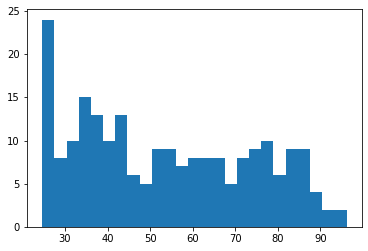

In [33]:
import statistics as std
dat = df[f'Resultados por Categoría {genre}'].to_list()
sorted(dat, reverse=True).pop(0)
mdat = np.ma.masked_array(dat,np.isnan(dat))
#mdat = np.delete(sorted(mdat, reverse=True), 0) #elminar el valor más grande


media_ly_lg = np.mean(mdat)
mediana_ly_lg = np.median(mdat)
moda_ly_lg = 0
#moda_ly_lg = stat.mode(dat)
desv_estandar = np.std(mdat)
primerq = np.quantile(mdat, 0.25)
segundoq = np.quantile(mdat, 0.50)
tercerq = np.quantile(mdat, 0.75)
plt.hist(mdat, bins=25)

print(f'Moda: {moda_ly_lg}, Media: {media_ly_lg}, Mediana: {mediana_ly_lg}, Desviación estandar: {desv_estandar}')
print(f'1er Q: {primerq}, 2er Q: {segundoq}, 3er Q: {tercerq}')

In [34]:
print(len(df))
df['Categoría'].value_counts()

217


acoso sexual    122
estereotipo      84
dominancia        8
desprestigio      3
Name: Categoría, dtype: int64

Resultados por Categoría Bolero    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

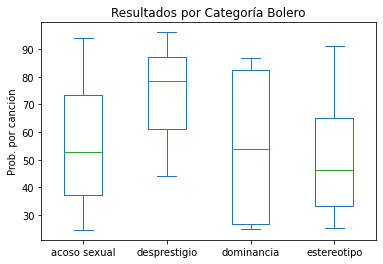

In [35]:
ax = plt.axes()
ax.set_ylabel('Prob. por canción')
ax.set_title(f'{genre.capitalize}')
df.plot.box(by='Categoría', ax=ax)

In [36]:
l = []
exam = []
for elm in tango['misogy_estr']:
    elm = ast.literal_eval(elm)
    if elm[2] > 2:
        l.append(elm[2])
    if elm[2] > 6:
        exam.append((elm[0], elm[1]))
len(l)

105

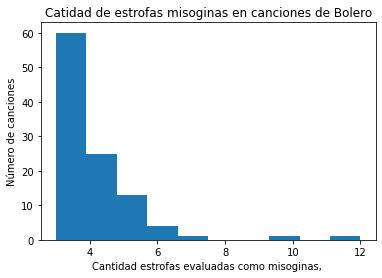

In [37]:
ax = plt.axes()
ax.set_ylabel('Número de canciones')
ax.set_xlabel(f'Cantidad estrofas evaluadas como misoginas, ')
ax.set_title(f'Catidad de estrofas misoginas en canciones de {genre}')
plt.hist(l, bins=10)
plt.show()

<AxesSubplot:ylabel='Categoría'>

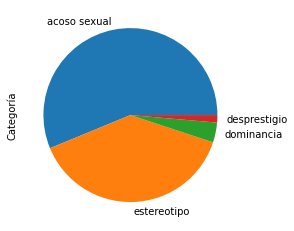

In [38]:
df['Categoría'].value_counts().plot.pie()

In [39]:
tango =tango.drop(['lang', 'lyric', 'lyric_length', 'lyric_by_e'], axis=1)

def set_est(li):
    import ast
    li = ast.literal_eval(li)

    a = li[0][0]
    b = li[0][1]

    if a == 'active' or a == 'passive':
        a = li[1][0]
        b = li[0][1]
    return(a, b)

def tag(t):
    return t[0]

def value(t):
    return t[1]
def count(s):
    t = ast.literal_eval(s)
    return t[2]
def exam(s):
    t = ast.literal_eval(s)
    return t[0]
tango['mayor_tag'] = tango['eval'].apply(set_est)
tango['tag'] = tango['mayor_tag'].apply(tag)
tango['value'] = tango['mayor_tag'].apply(value)
tango['estr_my'] = tango['misogy_estr'].apply(count)
tango['exam'] = tango['misogy_estr'].apply(exam)
tango = tango.drop(['misogy_estr', 'eval', 'mayor_tag'], axis=1)
tango.head()

,song_name,artist,tag,value,estr_my,exam
1,Cuando Llora Mi Guitarra,Julio Jaramillo,stereotype,3.006009,0,Guitarra Tú que interpretas en tu vibrar mi qu...
2,Te Lo Pido Por Favor,Juan Gabriel,sexual_harassment,8.103152,0,"Oh no, no, no Pero no me dejes nunca, nunca, n..."
3,Triunfamos,Los Panchos,sexual_harassment,2.326144,0,Une tu voz a mi voz Para gritar que vencimos Y...
4,Nuestro Juramento,Julio Jaramillo,sexual_harassment,37.707621,2,"Si tú mueres primero, yo te prometo Escribiré ..."
5,Sombras,Julio Jaramillo,sexual_harassment,69.541377,3,"En la penumbra vaga De la pequeña alcoba, Dond..."


In [40]:
length = tango.sort_values('value', ascending=False)[:40]
length[:10]

,song_name,artist,tag,value,estr_my,exam
568,Ladrona de Besos,Los Panchos,discredit,96.113515,3,Te vas de mi lado Buscando otra boca Ladrona d...
66,La Farsante,Juan Gabriel,sexual_harassment,93.854213,4,Porque tu a mis espaldas me hiciste traición H...
35,Madrid,Agustín Lara,sexual_harassment,92.770219,1,Madrid Madrid Madrid En México se piensa mucho...
714,Aventurera,Agustín Lara,stereotype,91.260940,3,Ya que la infamia de tu ruin destino Marchito ...
888,Loca Tentación,Agustín Lara,sexual_harassment,90.333033,3,En esta boca quiero beber Las dulces mieles de...
408,Mujer Ingrata,Oscar Agudelo,stereotype,90.026385,2,No te exijo que vuelvas a mi lado Porque creo ...
978,No lloraré,Los Dandys,sexual_harassment,88.710511,2,No lloraré mientras tenga tus labios Y me mire...
386,El Día Que Me Quieras,Los Panchos,sexual_harassment,88.193530,1,Acaricia mi ensueño El suave murmullo de tu su...
285,Violetas Imperiales,Antonio Prieto,stereotype,87.036937,1,"Violeta para ti, tengo yo una canción, la mism..."
146,Te voy a olvidar,Juan Gabriel,dominance,86.621654,6,"Te voy a olvidar, te voy a olvidar Aun que me ..."


In [41]:
length = tango.sort_values('estr_my', ascending=False)[:40]
length[:10]

,song_name,artist,tag,value,estr_my,exam
449,El Cuarto De Tula,Compay Segundo,stereotype,6.358850,12,"(dicho) Candela, muchacho Se volvió loco, Barb..."
684,Maria En La Playa,Compay Segundo,stereotype,29.180971,10,Dame una mano María Dame la otra María Dame lo...
243,La Flor de la Canela,Antonio Prieto,stereotype,75.307041,7,"Del puente a la alameda, menudo pie la lleva, ..."
374,Esta Rosa Roja,Juan Gabriel,sexual_harassment,85.993260,6,lalarailalaila......
908,Te Propongo Matrimonio,Juan Gabriel,sexual_harassment,62.096786,6,te propongo matrimonio
146,Te voy a olvidar,Juan Gabriel,dominance,86.621654,6,"Te voy a olvidar, te voy a olvidar Aun que me ..."
507,Con Una Rosa En La Mano,Juan Gabriel,sexual_harassment,85.344154,6,Lalarailalaila
385,Longina,Compay Segundo,sexual_harassment,82.307822,5,Te comparo con Una santa diosa Longina seducto...
302,Bésame,Juan Gabriel,sexual_harassment,76.968598,5,Besame a quien le tienes tanto miedo ...
144,Para Ti Madrecita,Julio Jaramillo,stereotype,35.747942,5,Yo sé que en este mundo hay una sola madre Y n...
